In [739]:
%matplotlib notebook

In [740]:
!pip install specreduce
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
import specreduce

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy.

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this:

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too)

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics.

Keep this plot handy. You should be able to intuitively convert between these values in your head.

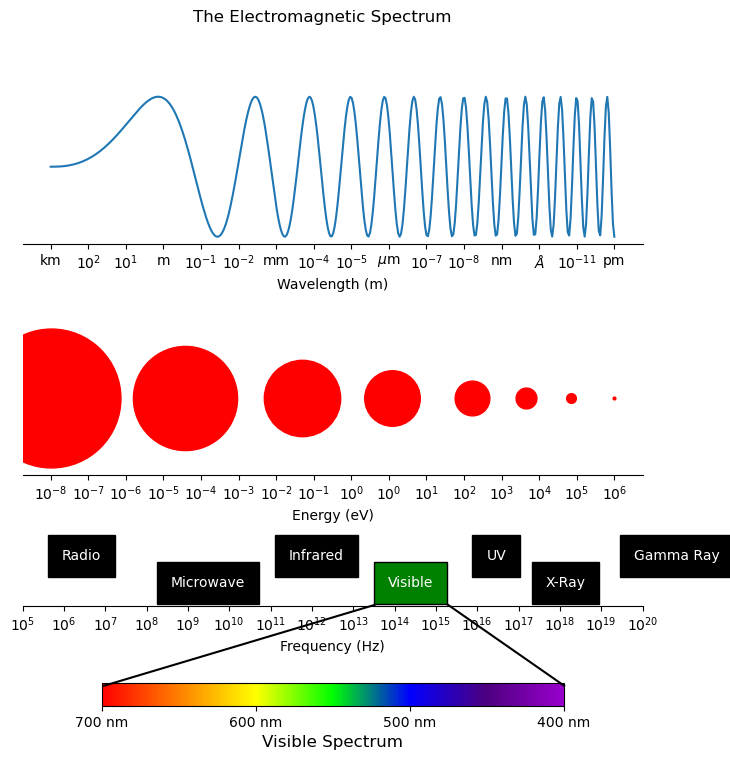

In [741]:
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from astropy import units as u
from astropy.constants import h, c

# Function for the waves
x = np.linspace(0, 2 * np.pi, 400)
y = 2*np.sin(x ** (2.5))

# Customizing the tick label for wavelength
tick_positions = np.linspace(0, 2 * np.pi, 16)
tick_values = np.logspace(3, -12, num=16)  # tick labels must be in logarithmic scale

# To convert wavelength to frequency
def wavelength_to_frequency(wavelength):
    wavelength = wavelength * u.m
    frequency = c / wavelength
    return frequency.to(u.Hz).value

# To convert wavelength to energy
def wavelength_to_energy(wavelength):
    wavelength = wavelength * u.m
    energy = (h * c) / wavelength
    return energy.to(u.eV).value

# Initializing the plots/subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 8))
fig.suptitle('The Electromagnetic Spectrum')

# Wavelength axis
ax1.plot(x, y, 'tab:blue')
ax1.set_xlabel('Wavelength (m)')
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(['km', f'$10^{2}$', f'$10^{1}$', 'm', f'$10^{{-1}}$', f'$10^{{-2}}$', 'mm', f'$10^{{-4}}$', f'$10^{{-5}}$', f'$\mu$m', f'$10^{{-7}}$', f'$10^{{-8}}$', 'nm', f'$\AA$', f'$10^{{-11}}$', 'pm'])

# Make the y axis not visible
ax1.yaxis.set_visible(False)
ax1.tick_params(left=False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Energy axis
ax2.set_xlabel('Energy (eV)')
ax2.set_xticks(tick_positions)
ax2.set_xticklabels([f'$10^{{{int(np.log10(wavelength_to_energy(t)))}}}$' for t in tick_values])

# Adding the "decoration"
ax2.plot([0], [0.6], 'ro', ms=100)
ax2.plot([1.5], [0.6], 'ro', ms=75)
ax2.plot([2.8], [0.6], 'ro', ms=55)
ax2.plot([3.8], [0.6], 'ro', ms=40)
ax2.plot([4.7], [0.6], 'ro', ms=25)
ax2.plot([5.3], [0.6], 'ro', ms=15)
ax2.plot([5.8], [0.6], 'ro', ms=7)
ax2.plot([2*np.pi], [0.6], 'ro', ms=2)

# Make the y axis not visible
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Frequency axis
ax3.set_xlabel('Frequency (Hz)')
ax3.set_xticks(tick_positions)
ax3.set_xticklabels([f'$10^{{{int(np.log10(wavelength_to_frequency(t)))}}}$' for t in tick_values])

# Make the y axis not visible
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Labeling the EM regions
ax3.text(0.4, 0.85, 'Radio', color='white', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 10})
ax3.text(1.5, 0.35, 'Microwave', color='white', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 10})
ax3.text(2.7, 0.85, 'Infrared', color='white', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 10})
ax3.text(3.7, 0.35, 'Visible', color='white', bbox={'facecolor': 'green', 'alpha': 1, 'pad': 10})
ax3.text(4.7, 0.85, 'UV', color='white', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 10})
ax3.text(5.3, 0.35, 'X-Ray', color='white', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 10})
ax3.text(6.2, 0.85, 'Gamma Ray', color='white', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 10})


# Creating the colorbar for visible spectrum

# Define the RGB colors
colors = [
    (1.0, 0.0, 0.0),    # Red (700 nm)
    (1.0, 0.5, 0.0),    # Orange (620 nm)
    (1.0, 1.0, 0.0),    # Yellow (580 nm)
    (0.0, 1.0, 0.0),    # Green (530 nm)
    (0.0, 0.0, 1.0),    # Blue (470 nm)
    (0.3, 0.0, 0.5),    # Indigo (450 nm)
    (0.6, 0.0, 0.8)     # Violet (400 nm)
]

# Create the visible spectrum colormap
visible_spectrum_cmap = LinearSegmentedColormap.from_list('visible_spectrum', colors)
sm = plt.cm.ScalarMappable(cmap=visible_spectrum_cmap, norm=plt.Normalize(vmin=400, vmax=700))

# Adding the colorbar
cbar = fig.colorbar(sm, orientation='horizontal', pad=0.5, ax=ax3)

# Set the tick labels
cbar.set_ticks([400, 500, 600, 700])
cbar.set_ticklabels(['700 nm', '600 nm', '500 nm', '400 nm'])
cbar.set_label('Visible Spectrum', fontsize=12)

# Connecting line from the visible box to colorbar
line1 = Line2D([0.565, 0.227], [0.236, 0.135], transform=fig.transFigure, color='black')
line2 = Line2D([0.657, 0.802], [0.236, 0.135], transform=fig.transFigure, color='black')

# Add the line to the figure
fig.add_artist(line1)
fig.add_artist(line2)

plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots
plt.show()

# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission.

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy!

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need):
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

In [742]:
import pandas as pd
from astropy.io import fits

# Calibrating the data wavelength to microns

# Editing the LSST filters
filters = ['u', 'g', 'r', 'i', 'z', 'y']
column_names = ['wavelength', 'transmission']

for filter in filters:
    file_path = f'./Data/LSST/LSST_LSST.{filter}_filter.dat'
    df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)
    
    # Convert the wavelength to microns
    df['wavelength'] /= 10000  
    
    # Convert df back to .dat file
    output_file = f'./Data/LSST/modified/LSST_modified.{filter}_file.dat'
    df.to_csv(output_file, sep=' ', index=False, header=False)
    
filters_JHK = ['j', 'h', 'k']

for filter in filters_JHK:
    file_path = f'./Data/IRTF/nsfcam_{filter}mk_trans.dat'
    df = pd.read_csv(file_path, delim_whitespace=True, usecols=[0, 1], names=column_names) # Just using the first two columns, because the other two is created by the spacing between headers
    df = df.drop(df.index[0]) # Erase the previous header because it's problematic
    df['transmission'] = pd.to_numeric(df['transmission'], errors='coerce') # Convert the transmission data to numeric first (otherwise cannot be calculated)
    df['transmission'] /= 100
    
    # Convert df back to .dat file
    output_file = f'./Data/IRTF/modified/nsfcam_{filter}mk_trans_modified.dat'
    df.to_csv(output_file, sep=' ', index=False, header=False)
    
# Stars data from FITS
alpha_lyr_file = './Data/stars/alpha_lyr_stis_011.fits'
bd11_file = './Data/stars/bd11d3759_stis_003.fits'
Sun_file = './Data/stars/sun_reference_stis_002.fits'

# Opening Alpha Lyrae FITS file
hdul = fits.open(alpha_lyr_file)
data = hdul[1].data
# getting their wavelength and flux and max flux
flux_alpha_lyr_ori = data['flux']
max_flux = np.max(data['flux'])
wavelength_alpha_lyr = data['wavelength']/10000
flux_alpha_lyr = data['flux']/max_flux
# saving the data to a .txt file
data_alpha_lyr = np.column_stack((wavelength_alpha_lyr, data['flux']))
np.savetxt('./Data/stars/modified/alpha_lyr_wave_flux.txt', data_alpha_lyr, header='Wavelength Flux', comments='')
hdul.close()

# Opening BD-11 3759 FITS file
hdul = fits.open(bd11_file)
data = hdul[1].data
# getting their wavelength and flux and max flux
flux_bd11_ori = data['flux']
max_flux = np.max(data['flux'])
wavelength_bd11 = data['wavelength']/10000
flux_bd11 = data['flux']/max_flux
# saving the data to a .txt file
data_bd11 = np.column_stack((wavelength_bd11, data['flux']))
np.savetxt('./Data/stars/modified/bd11_wave_flux.txt', data_bd11, header='Wavelength Flux', comments='')
hdul.close()

# Opening Sun FITS file
hdul = fits.open(Sun_file)
data = hdul[1].data
# getting their wavelength and flux and max flux
flux_Sun_ori = data['flux']
max_flux = np.max(data['flux'])
wavelength_Sun = data['wavelength']/10000
flux_Sun = data['flux']/max_flux
# saving the data to a .txt file
data_Sun = np.column_stack((wavelength_Sun, data['flux']))
np.savetxt('./Data/stars/modified/Sun_wave_flux.txt', data_Sun, header='Wavelength Flux', comments='')
hdul.close()

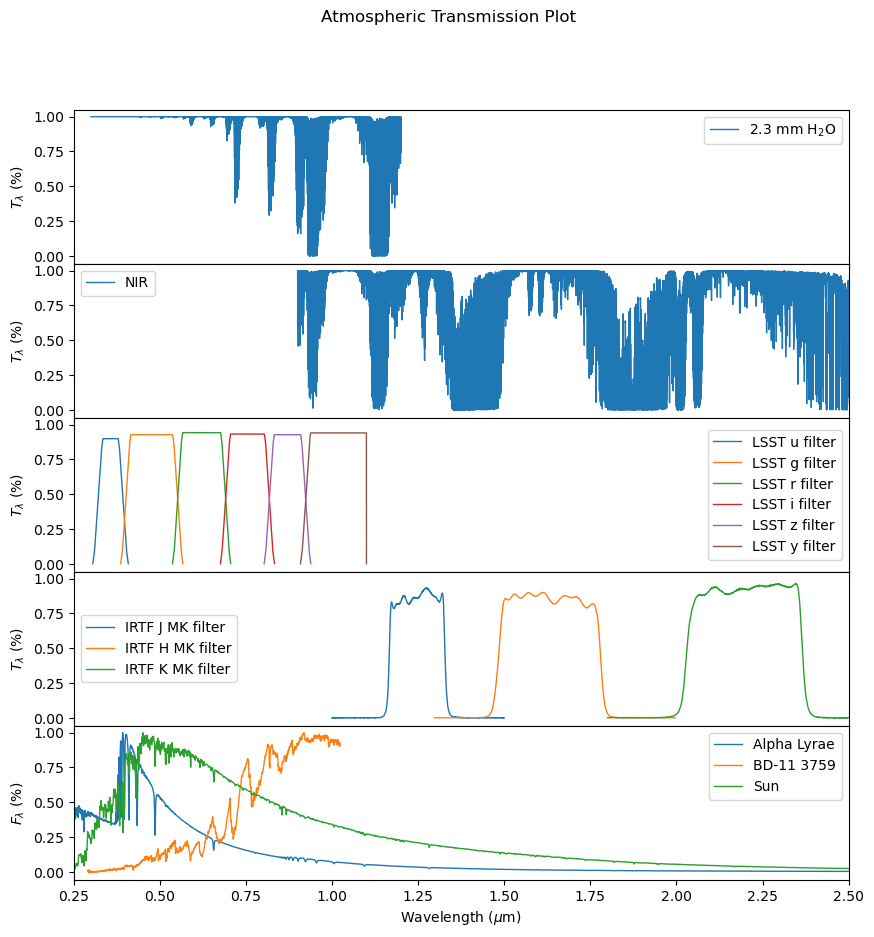

In [743]:
from specreduce.calibration_data import AtmosphericTransmission
# Initializing the figure
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(5, hspace=0) # Make sure there is 5 subplots for 2.3mm, NIR, LSST, IRTF, CALSPEC
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Atmospheric Transmission Plot')

# Plot the extinction model
ext23mm = AtmosphericTransmission(data_file="./Data/2.3mm/2.3mm_pwv_transmission.txt")
ext_NIR = AtmosphericTransmission(data_file="./Data/cp_nir_mir/cptrans_zm_23_10.dat")
# ext_MIR = AtmosphericTransmission(data_file="./Data/cp_nir_mir/cptrans_nq_23_10.dat")
ext_LSST_u = AtmosphericTransmission(data_file='./Data/LSST/modified/LSST_modified.u_file.dat')
ext_LSST_g = AtmosphericTransmission(data_file="./Data/LSST/modified/LSST_modified.g_file.dat")
ext_LSST_r = AtmosphericTransmission(data_file="./Data/LSST/modified/LSST_modified.r_file.dat")
ext_LSST_i = AtmosphericTransmission(data_file="./Data/LSST/modified/LSST_modified.i_file.dat")
ext_LSST_y = AtmosphericTransmission(data_file="./Data/LSST/modified/LSST_modified.y_file.dat")
ext_LSST_z = AtmosphericTransmission(data_file="./Data/LSST/modified/LSST_modified.z_file.dat")
ext_IRTF_J = AtmosphericTransmission(data_file="./Data/IRTF/modified/nsfcam_jmk_trans_modified.dat")
ext_IRTF_H = AtmosphericTransmission(data_file="./Data/IRTF/modified/nsfcam_hmk_trans_modified.dat")
ext_IRTF_K = AtmosphericTransmission(data_file="./Data/IRTF/modified/nsfcam_kmk_trans_modified.dat")

# Plotting the models
axs[0].plot(ext23mm.spectral_axis, ext23mm.transmission, label=r"2.3 mm H$_{2}$O", linewidth=1)
axs[1].plot(ext_NIR.spectral_axis, ext_NIR.transmission, label=r"NIR", linewidth=1)
# ax[1].plot(ext_MIR.spectral_axis, ext_MIR.transmission, label=r"MIR", linewidth=1)
axs[2].plot(ext_LSST_u.spectral_axis, ext_LSST_u.transmission, label=r"LSST u filter", linewidth=1)
axs[2].plot(ext_LSST_g.spectral_axis, ext_LSST_g.transmission, label=r"LSST g filter", linewidth=1)
axs[2].plot(ext_LSST_r.spectral_axis, ext_LSST_r.transmission, label=r"LSST r filter", linewidth=1)
axs[2].plot(ext_LSST_i.spectral_axis, ext_LSST_i.transmission, label=r"LSST i filter", linewidth=1)
axs[2].plot(ext_LSST_z.spectral_axis, ext_LSST_z.transmission, label=r"LSST z filter", linewidth=1)
axs[2].plot(ext_LSST_y.spectral_axis, ext_LSST_y.transmission, label=r"LSST y filter", linewidth=1)
axs[3].plot(ext_IRTF_J.spectral_axis, ext_IRTF_J.transmission, label=r"IRTF J MK filter", linewidth=1)
axs[3].plot(ext_IRTF_H.spectral_axis, ext_IRTF_H.transmission, label=r"IRTF H MK filter", linewidth=1)
axs[3].plot(ext_IRTF_K.spectral_axis, ext_IRTF_K.transmission, label=r"IRTF K MK filter", linewidth=1)
axs[4].plot(wavelength_alpha_lyr, flux_alpha_lyr, label=r"Alpha Lyrae", linewidth=1)
axs[4].plot(wavelength_bd11, flux_bd11, label=r"BD-11 3759", linewidth=1)
axs[4].plot(wavelength_Sun, flux_Sun, label=r"Sun", linewidth=1)

# "Decorating" the plot
axs[1].set_xlim(0.25, 2.5)
axs[4].set_xlabel(r"Wavelength ($\mu$m)")
for i in range(4): 
    axs[i].set_ylabel(r"$T_{\lambda}$ (%)")
axs[4].set_ylabel(r"$F_{\lambda}$ (%)")
#axs[0].tick_params(axis='y', labelsize=6)
axs[0].legend()
axs[1].legend()
axs[2].legend(loc="center right")
axs[3].legend(loc="center left")
axs[4].legend()
plt.show()

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals include the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK)
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [744]:
from scipy import interpolate

# Find out the wavelength range first
min_wave_range = np.min(ext23mm.spectral_axis) # = 0.3 microns
max_wave_range = np.max(ext_IRTF_K.spectral_axis) # 2.5 microns
print("Minimum wavelength range to interpolate:", min_wave_range)
print("Maximum wavelength range to interpolate:", max_wave_range)

# Find out the wavelength range that the 2.3mm H2O and NIR atmospheric transmission coincide, i.e. from the min of NIR and max of H2O
print(f"The wavelength range that the 2.3mm H2O and NIR atmospheric transmission coincide is between {np.min(ext_NIR.spectral_axis)} and {np.max(ext23mm.spectral_axis)}") # 0.9 to 1.2 microns
# In the above range, we will just use the atmospheric transmission of the NIR

# Filter the NIR atmospheric transmission into upto 2.5 microns
df = pd.read_csv('./Data/cp_nir_mir/cptrans_zm_23_10.dat', delim_whitespace=True, names=['wavelength', 'transmission'])
filtered_NIF_Transmission = df[(df['wavelength'] >= 0.3) & (df['wavelength'] <= 2.5)]

# Filter the Flux of Alpha Lyrae, Sun, and BD-11 3759 in between 0.3 to 2.5 microns
df = pd.read_csv('./Data/stars/modified/alpha_lyr_wave_flux.txt', delim_whitespace=True)
filtered_alpha_lyr_wave_flux = df[(df['Wavelength'] >= 0.3) & (df['Wavelength'] <= 2.503)]

df = pd.read_csv('./Data/stars/modified/bd11_wave_flux.txt', delim_whitespace=True)
filtered_bd11_wave_flux = df[(df['Wavelength'] >= 0.3) & (df['Wavelength'] <= 2.5)]

df = pd.read_csv('./Data/stars/modified/Sun_wave_flux.txt', delim_whitespace=True)
filtered_Sun_wave_flux = df[(df['Wavelength'] >= 0.3) & (df['Wavelength'] <= 2.501)]


# Interpolating the transmission, filters, and SEDs
'''
# First method: using scipy.interpolate.interp1d
T_23mm = interpolate.interp1d(ext23mm.spectral_axis, ext23mm.transmission)
T_NIR = interpolate.interp1d(filtered_NIF_Transmission['wavelength'], filtered_NIF_Transmission['transmission'])
T_LSST_u = interpolate.interp1d(ext_LSST_u.spectral_axis, ext_LSST_u.transmission) # 0.3054 to 0.4085 microns
T_LSST_g = interpolate.interp1d(ext_LSST_g.spectral_axis, ext_LSST_g.transmission) # 0.3864 to 0.5669 microns
T_LSST_r = interpolate.interp1d(ext_LSST_r.spectral_axis, ext_LSST_r.transmission) # 0.537 to 0.7059 microns
T_LSST_i = interpolate.interp1d(ext_LSST_i.spectral_axis, ext_LSST_i.transmission) # 0.676 to 0.8329 microns
T_LSST_z = interpolate.interp1d(ext_LSST_z.spectral_axis, ext_LSST_z.transmission) # 0.803 to 0.9385 microns
T_LSST_y = interpolate.interp1d(ext_LSST_y.spectral_axis, ext_LSST_y.transmission) # 0.9084 to 1.1 microns
T_IRTF_J = interpolate.interp1d(ext_IRTF_J.spectral_axis, ext_IRTF_J.transmission) # 1.0 to 1.5 microns
T_IRTF_H = interpolate.interp1d(ext_IRTF_H.spectral_axis, ext_IRTF_H.transmission) # 1.2977 to 1.9964 microns
T_IRTF_K = interpolate.interp1d(ext_IRTF_K.spectral_axis, ext_IRTF_K.transmission) # 1.8 to 2.5 microns
T_alpha_lyr = interpolate.interp1d(filtered_alpha_lyr_wave_flux['Wavelength'], filtered_alpha_lyr_wave_flux['Flux'])
T_bd11 = interpolate.interp1d(filtered_bd11_wave_flux['Wavelength'], filtered_bd11_wave_flux['Flux'], fill_value='extrapolate')
T_Sun = interpolate.interp1d(filtered_Sun_wave_flux['Wavelength'], filtered_Sun_wave_flux['Flux'])
'''

# Second method: using np.interp
def interpolation(x_vals, y_vals):
    def interpolator(x_new):
        return np.interp(x_new, x_vals, y_vals)
    return interpolator
T_23mm = interpolation(ext23mm.spectral_axis/(u.um), ext23mm.transmission)
T_NIR = interpolation(filtered_NIF_Transmission['wavelength'], filtered_NIF_Transmission['transmission'])
T_LSST_u = interpolation(ext_LSST_u.spectral_axis/(u.um), ext_LSST_u.transmission) # 0.3054 to 0.4085 microns
T_LSST_g = interpolation(ext_LSST_g.spectral_axis/(u.um), ext_LSST_g.transmission) # 0.3864 to 0.5669 microns
T_LSST_r = interpolation(ext_LSST_r.spectral_axis/(u.um), ext_LSST_r.transmission) # 0.537 to 0.7059 microns
T_LSST_i = interpolation(ext_LSST_i.spectral_axis/(u.um), ext_LSST_i.transmission) # 0.676 to 0.8329 microns
T_LSST_z = interpolation(ext_LSST_z.spectral_axis/(u.um), ext_LSST_z.transmission) # 0.803 to 0.9385 microns
T_LSST_y = interpolation(ext_LSST_y.spectral_axis/(u.um), ext_LSST_y.transmission) # 0.9084 to 1.1 microns
T_IRTF_J = interpolation(ext_IRTF_J.spectral_axis/(u.um), ext_IRTF_J.transmission) # 1.0 to 1.5 microns
T_IRTF_H = interpolation(ext_IRTF_H.spectral_axis/(u.um), ext_IRTF_H.transmission) # 1.2977 to 1.9964 microns
T_IRTF_K = interpolation(ext_IRTF_K.spectral_axis/(u.um), ext_IRTF_K.transmission) # 1.8 to 2.5 microns
T_alpha_lyr = interpolation(filtered_alpha_lyr_wave_flux['Wavelength'], filtered_alpha_lyr_wave_flux['Flux'])
T_bd11 = interpolation(filtered_bd11_wave_flux['Wavelength'], filtered_bd11_wave_flux['Flux'])
T_Sun = interpolation(filtered_Sun_wave_flux['Wavelength'], filtered_Sun_wave_flux['Flux'])



Minimum wavelength range to interpolate: 0.3 um
Maximum wavelength range to interpolate: 2.5 um
The wavelength range that the 2.3mm H2O and NIR atmospheric transmission coincide is between 0.9 um and 1.2 um


In [745]:
from scipy.integrate import simpson
import astropy.units as u

log = np.log10 # For simplicity

# Defining the wavelengths array for each filter for integration
wavelength_u_filter = np.linspace(0.3054, 0.4085, 100000)
wavelength_g_filter = np.linspace(0.3864, 0.5669, 100000)
wavelength_r_filter = np.linspace(0.537, 0.7059, 100000)
wavelength_i_filter = np.linspace(0.676, 0.8329, 100000)
wavelength_z_filter_part1 = np.linspace(0.803, 0.9, 100000) # We will use the T_23mm for this one
wavelength_z_filter_part2 = np.linspace(0.9, 0.9385, 100000) # And use the T_NIR for the second part
wavelength_y_filter = np.linspace(0.9084, 1.1, 100000)
wavelength_J_filter = np.linspace(1.0, 1.5, 100000)
wavelength_J_filter_bd11 = np.linspace(1.0, np.max(filtered_bd11_wave_flux['Wavelength']), 100000) # Only integrate J filter upto the available wavelength & data for BD-11 magnitude
wavelength_H_filter = np.linspace(1.2977, 1.9964, 100000)
wavelength_K_filter = np.linspace(1.8, 2.5, 100000)

def F_AB_lambda(wavelength_micron):
    F_AB = 3631 * u.Jy
    wavelength = wavelength_micron * u.micron
    F_AB_synth = F_AB.to(u.erg / (u.s * u.cm**2 * u.AA), equivalencies=u.spectral_density(wavelength))
    return F_AB_synth.value

In [746]:
# For u_filter:
# Defining integration function
def func_flux_AB_u(x):
    return F_AB_lambda(x)*T_LSST_u(x)*T_23mm(x)

def func_flux_vega_u(x):
    return T_alpha_lyr(x)*T_LSST_u(x)*T_23mm(x)

def func_flux_Sun_u(x):
    return T_Sun(x)*T_LSST_u(x)*T_23mm(x)

def func_flux_bd11_u(x):
    return T_bd11(x)*T_LSST_u(x)*T_23mm(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_u = func_flux_AB_u(wavelength_u_filter)
func_values_flux_vega_u = func_flux_vega_u(wavelength_u_filter)
func_values_flux_Sun_u = func_flux_Sun_u(wavelength_u_filter)
func_values_flux_bd11_u = func_flux_bd11_u(wavelength_u_filter)

# Integrating the flux using simpson's rule
flux_AB_u = simpson(func_values_flux_AB_u, wavelength_u_filter)
flux_vega_u = simpson(func_values_flux_vega_u, wavelength_u_filter)
flux_Sun_u = simpson(func_values_flux_Sun_u, wavelength_u_filter)
flux_bd11_u = simpson(func_values_flux_bd11_u, wavelength_u_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_u_vegsys = -2.5*log(flux_Sun_u/flux_vega_u)
m_bd11_u_vegsys = -2.5*log(flux_bd11_u/flux_vega_u)
m_Sun_u_AB = -2.5*log(flux_Sun_u/flux_AB_u)
m_bd11_u_AB = -2.5*log(flux_bd11_u/flux_AB_u)
m_vega_u_AB = -2.5*log(flux_vega_u/flux_AB_u)

In [747]:
# For g_filter:
# Defining integration function
def func_flux_AB_g(x):
    return F_AB_lambda(x)*T_LSST_g(x)*T_23mm(x)

def func_flux_vega_g(x):
    return T_alpha_lyr(x)*T_LSST_g(x)*T_23mm(x)

def func_flux_Sun_g(x):
    return T_Sun(x)*T_LSST_g(x)*T_23mm(x)

def func_flux_bd11_g(x):
    return T_bd11(x)*T_LSST_g(x)*T_23mm(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_g = func_flux_AB_g(wavelength_g_filter)
func_values_flux_vega_g = func_flux_vega_g(wavelength_g_filter)
func_values_flux_Sun_g = func_flux_Sun_g(wavelength_g_filter)
func_values_flux_bd11_g = func_flux_bd11_g(wavelength_g_filter)

# Integrating the flux using simpson's rule
flux_AB_g = simpson(func_values_flux_AB_g, wavelength_g_filter)
flux_vega_g = simpson(func_values_flux_vega_g, wavelength_g_filter)
flux_Sun_g = simpson(func_values_flux_Sun_g, wavelength_g_filter)
flux_bd11_g = simpson(func_values_flux_bd11_g, wavelength_g_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_g_vegsys = -2.5*log(flux_Sun_g/flux_vega_g)
m_bd11_g_vegsys = -2.5*log(flux_bd11_g/flux_vega_g)
m_Sun_g_AB = -2.5*log(flux_Sun_g/flux_AB_g)
m_bd11_g_AB = -2.5*log(flux_bd11_g/flux_AB_g)
m_vega_g_AB = -2.5*log(flux_vega_g/flux_AB_g)

In [748]:
# For r_filter:
# Defining integration function
def func_flux_AB_r(x):
    return F_AB_lambda(x)*T_LSST_r(x)*T_23mm(x)

def func_flux_vega_r(x):
    return T_alpha_lyr(x)*T_LSST_r(x)*T_23mm(x)

def func_flux_Sun_r(x):
    return T_Sun(x)*T_LSST_r(x)*T_23mm(x)

def func_flux_bd11_r(x):
    return T_bd11(x)*T_LSST_r(x)*T_23mm(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_r = func_flux_AB_r(wavelength_r_filter)
func_values_flux_vega_r = func_flux_vega_r(wavelength_r_filter)
func_values_flux_Sun_r = func_flux_Sun_r(wavelength_r_filter)
func_values_flux_bd11_r = func_flux_bd11_r(wavelength_r_filter)

# Integrating the flux using simpson's rule
flux_AB_r = simpson(func_values_flux_AB_r, wavelength_r_filter)
flux_vega_r = simpson(func_values_flux_vega_r, wavelength_r_filter)
flux_Sun_r = simpson(func_values_flux_Sun_r, wavelength_r_filter)
flux_bd11_r = simpson(func_values_flux_bd11_r, wavelength_r_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_r_vegsys = -2.5*log(flux_Sun_r/flux_vega_r)
m_bd11_r_vegsys = -2.5*log(flux_bd11_r/flux_vega_r)
m_Sun_r_AB = -2.5*log(flux_Sun_r/flux_AB_r)
m_bd11_r_AB = -2.5*log(flux_bd11_r/flux_AB_r)
m_vega_r_AB = -2.5*log(flux_vega_r/flux_AB_r)

In [749]:
# For i_filter:
# Defining integration function
def func_flux_AB_i(x):
    return F_AB_lambda(x)*T_LSST_i(x)*T_23mm(x)

def func_flux_vega_i(x):
    return T_alpha_lyr(x)*T_LSST_i(x)*T_23mm(x)

def func_flux_Sun_i(x):
    return T_Sun(x)*T_LSST_i(x)*T_23mm(x)

def func_flux_bd11_i(x):
    return T_bd11(x)*T_LSST_i(x)*T_23mm(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_i = func_flux_AB_i(wavelength_i_filter)
func_values_flux_vega_i = func_flux_vega_i(wavelength_i_filter)
func_values_flux_Sun_i = func_flux_Sun_i(wavelength_i_filter)
func_values_flux_bd11_i = func_flux_bd11_i(wavelength_i_filter)

# Integrating the flux using simpson's rule
flux_AB_i = simpson(func_values_flux_AB_i, wavelength_i_filter)
flux_vega_i = simpson(func_values_flux_vega_i, wavelength_i_filter)
flux_Sun_i = simpson(func_values_flux_Sun_i, wavelength_i_filter)
flux_bd11_i = simpson(func_values_flux_bd11_i, wavelength_i_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_i_vegsys = -2.5*log(flux_Sun_i/flux_vega_i)
m_bd11_i_vegsys = -2.5*log(flux_bd11_i/flux_vega_i)
m_Sun_i_AB = -2.5*log(flux_Sun_i/flux_AB_i)
m_bd11_i_AB = -2.5*log(flux_bd11_i/flux_AB_i)
m_vega_i_AB = -2.5*log(flux_vega_i/flux_AB_i)

In [750]:
# For z_filter:
# Defining integration function
def func_flux_AB_z1(x):
    return F_AB_lambda(x)*T_LSST_z(x)*T_23mm(x)

def func_flux_vega_z1(x):
    return T_alpha_lyr(x)*T_LSST_z(x)*T_23mm(x)

def func_flux_Sun_z1(x):
    return T_Sun(x)*T_LSST_z(x)*T_23mm(x)

def func_flux_bd11_z1(x):
    return T_bd11(x)*T_LSST_z(x)*T_23mm(x)

def func_flux_AB_z2(x):
    return F_AB_lambda(x)*T_LSST_z(x)*T_23mm(x)*T_NIR(x)

def func_flux_vega_z2(x):
    return T_alpha_lyr(x)*T_LSST_z(x)*T_23mm(x)*T_NIR(x)

def func_flux_Sun_z2(x):
    return T_Sun(x)*T_LSST_z(x)*T_23mm(x)*T_NIR(x)

def func_flux_bd11_z2(x):
    return T_bd11(x)*T_LSST_z(x)*T_23mm(x)*T_NIR(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_z1 = func_flux_AB_z1(wavelength_z_filter_part1)
func_values_flux_vega_z1 = func_flux_vega_z1(wavelength_z_filter_part1)
func_values_flux_Sun_z1 = func_flux_Sun_z1(wavelength_z_filter_part1)
func_values_flux_bd11_z1 = func_flux_bd11_z1(wavelength_z_filter_part1)
func_values_flux_AB_z2 = func_flux_AB_z2(wavelength_z_filter_part2)
func_values_flux_vega_z2 = func_flux_vega_z2(wavelength_z_filter_part2)
func_values_flux_Sun_z2 = func_flux_Sun_z2(wavelength_z_filter_part2)
func_values_flux_bd11_z2 = func_flux_bd11_z2(wavelength_z_filter_part2)

# Integrating the flux using simpson's rule
flux_AB_z = simpson(func_values_flux_AB_z1, wavelength_z_filter_part1) + simpson(func_values_flux_AB_z2, wavelength_z_filter_part2)
flux_vega_z = simpson(func_values_flux_vega_z1, wavelength_z_filter_part1) + simpson(func_values_flux_vega_z2, wavelength_z_filter_part2)
flux_Sun_z = simpson(func_values_flux_Sun_z1, wavelength_z_filter_part1) + simpson(func_values_flux_Sun_z2, wavelength_z_filter_part2)
flux_bd11_z = simpson(func_values_flux_bd11_z1, wavelength_z_filter_part1) + simpson(func_values_flux_bd11_z2, wavelength_z_filter_part2)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_z_vegsys = -2.5*log(flux_Sun_z/flux_vega_z)
m_bd11_z_vegsys = -2.5*log(flux_bd11_z/flux_vega_z)
m_Sun_z_AB = -2.5*log(flux_Sun_z/flux_AB_z)
m_bd11_z_AB = -2.5*log(flux_bd11_z/flux_AB_z)
m_vega_z_AB = -2.5*log(flux_vega_z/flux_AB_z)

In [751]:
# For y_filter:
# Defining integration function
def func_flux_AB_y(x):
    return F_AB_lambda(x)*T_LSST_y(x)*T_23mm(x)*T_NIR(x)

def func_flux_vega_y(x):
    return T_alpha_lyr(x)*T_LSST_y(x)*T_23mm(x)*T_NIR(x)

def func_flux_Sun_y(x):
    return T_Sun(x)*T_LSST_y(x)*T_23mm(x)*T_NIR(x)

def func_flux_bd11_y(x):
    return T_bd11(x)*T_LSST_y(x)*T_23mm(x)*T_NIR(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_y = func_flux_AB_y(wavelength_y_filter)
func_values_flux_vega_y = func_flux_vega_y(wavelength_y_filter)
func_values_flux_Sun_y = func_flux_Sun_y(wavelength_y_filter)
func_values_flux_bd11_y = func_flux_bd11_y(wavelength_y_filter)

# Integrating the flux using simpson's rule
flux_AB_y = simpson(func_values_flux_AB_y, wavelength_y_filter)
flux_vega_y = simpson(func_values_flux_vega_y, wavelength_y_filter)
flux_Sun_y = simpson(func_values_flux_Sun_y, wavelength_y_filter)
flux_bd11_y = simpson(func_values_flux_bd11_y, wavelength_y_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_y_vegsys = -2.5*log(flux_Sun_y/flux_vega_y)
m_bd11_y_vegsys = -2.5*log(flux_bd11_y/flux_vega_y)
m_Sun_y_AB = -2.5*log(flux_Sun_y/flux_AB_y)
m_bd11_y_AB = -2.5*log(flux_bd11_y/flux_AB_y)
m_vega_y_AB = -2.5*log(flux_vega_y/flux_AB_y)

In [752]:
# For J_filter:
# Defining integration function
def func_flux_AB_J(x):
    return F_AB_lambda(x)*T_IRTF_J(x)*T_NIR(x)

def func_flux_vega_J(x):
    return T_alpha_lyr(x)*T_IRTF_J(x)*T_NIR(x)

def func_flux_Sun_J(x):
    return T_Sun(x)*T_IRTF_J(x)*T_NIR(x)

def func_flux_bd11_J(x):
    return T_bd11(x)*T_IRTF_J(x)*T_NIR(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_J = func_flux_AB_J(wavelength_J_filter)
func_values_flux_vega_J = func_flux_vega_J(wavelength_J_filter)
func_values_flux_Sun_J = func_flux_Sun_J(wavelength_J_filter)
func_values_flux_bd11_J = func_flux_bd11_J(wavelength_J_filter_bd11) # Only upto BD-11 available wavelength & data

# Integrating the flux using simpson's rule
flux_AB_J = simpson(func_values_flux_AB_J, wavelength_J_filter)
flux_vega_J = simpson(func_values_flux_vega_J, wavelength_J_filter)
flux_Sun_J = simpson(func_values_flux_Sun_J, wavelength_J_filter) 
flux_bd11_J = simpson(func_values_flux_bd11_J, wavelength_J_filter_bd11) # Only upto BD-11 available wavelength & data

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_J_vegsys = -2.5*log(flux_Sun_J/flux_vega_J)
m_bd11_J_vegsys = -2.5*log(flux_bd11_J/flux_vega_J)
m_Sun_J_AB = -2.5*log(flux_Sun_J/flux_AB_J)
m_bd11_J_AB = -2.5*log(flux_bd11_J/flux_AB_J)
m_vega_J_AB = -2.5*log(flux_vega_J/flux_AB_J)

In [753]:
# For H_filter:
# Defining integration function
def func_flux_AB_H(x):
    return F_AB_lambda(x)*T_IRTF_H(x)*T_NIR(x)

def func_flux_vega_H(x):
    return T_alpha_lyr(x)*T_IRTF_H(x)*T_NIR(x)

def func_flux_Sun_H(x):
    return T_Sun(x)*T_IRTF_H(x)*T_NIR(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_H = func_flux_AB_H(wavelength_H_filter)
func_values_flux_vega_H = func_flux_vega_H(wavelength_H_filter)
func_values_flux_Sun_H = func_flux_Sun_H(wavelength_H_filter)

# Integrating the flux using simpson's rule
flux_AB_H = simpson(func_values_flux_AB_H, wavelength_H_filter)
flux_vega_H = simpson(func_values_flux_vega_H, wavelength_H_filter)
flux_Sun_H = simpson(func_values_flux_Sun_H, wavelength_H_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_H_vegsys = -2.5*log(flux_Sun_H/flux_vega_H)
m_Sun_H_AB = -2.5*log(flux_Sun_H/flux_AB_H)
m_vega_H_AB = -2.5*log(flux_vega_H/flux_AB_H)

In [754]:
# For K_filter:
# Defining integration function
def func_flux_AB_K(x):
    return F_AB_lambda(x)*T_IRTF_K(x)*T_NIR(x)

def func_flux_vega_K(x):
    return T_alpha_lyr(x)*T_IRTF_K(x)*T_NIR(x)

def func_flux_Sun_K(x):
    return T_Sun(x)*T_IRTF_K(x)*T_NIR(x)

# The product function values - to integrate using simpson's rule
func_values_flux_AB_K = func_flux_AB_K(wavelength_K_filter)
func_values_flux_vega_K = func_flux_vega_K(wavelength_K_filter)
func_values_flux_Sun_K = func_flux_Sun_K(wavelength_K_filter)

# Integrating the flux using simpson's rule
flux_AB_K = simpson(func_values_flux_AB_K, wavelength_K_filter)
flux_vega_K = simpson(func_values_flux_vega_K, wavelength_K_filter)
flux_Sun_K = simpson(func_values_flux_Sun_K, wavelength_K_filter)

# Calculating the magnitude of Sun, BD-11 3759, and Vega
m_Sun_K_vegsys = -2.5*log(flux_Sun_K/flux_vega_K)
m_Sun_K_AB = -2.5*log(flux_Sun_K/flux_AB_K)
m_vega_K_AB = -2.5*log(flux_vega_K/flux_AB_K)

In [755]:
# Printing the table of magnitudes
data = {
    "LSST u Filter": [m_Sun_u_vegsys, m_Sun_u_AB, m_bd11_u_vegsys, m_bd11_u_AB, m_vega_u_AB],
    "LSST g Filter": [m_Sun_g_vegsys, m_Sun_g_AB, m_bd11_g_vegsys, m_bd11_g_AB, m_vega_g_AB],
    "LSST r Filter": [m_Sun_r_vegsys, m_Sun_r_AB, m_bd11_r_vegsys, m_bd11_r_AB, m_vega_r_AB],
    "LSST i Filter": [m_Sun_i_vegsys, m_Sun_i_AB, m_bd11_i_vegsys, m_bd11_i_AB, m_vega_i_AB],
    "LSST z Filter": [m_Sun_z_vegsys, m_Sun_z_AB, m_bd11_z_vegsys, m_bd11_z_AB, m_vega_z_AB],
    "LSST y Filter": [m_Sun_y_vegsys, m_Sun_y_AB, m_bd11_y_vegsys, m_bd11_y_AB, m_vega_y_AB],
    "IRTF J Filter": [m_Sun_J_vegsys, m_Sun_J_AB, m_bd11_J_vegsys, m_bd11_J_AB, m_vega_J_AB],
    "IRTF H Filter": [m_Sun_H_vegsys, m_Sun_H_AB, 'N/A', 'N/A', m_vega_H_AB],
    "IRTF K Filter": [m_Sun_K_vegsys, m_Sun_K_AB, 'N/A', 'N/A', m_vega_K_AB],
}

# Create row labels
row_labels = ['Sun magnitude in Vega System', 'Sun magnitude in AB System', 
              'BD-11 3759 magnitude in Vega System (Flux data cut-off after 1.0235 microns)', 
              'BD-11 3759 magnitude in AB System (Flux data cut-off after 1.0235 microns)', 
              'Vega magnitude in AB system']

# Create the data frame
df_mags = pd.DataFrame(data, index=row_labels)
df_mags

,LSST u Filter,LSST g Filter,LSST r Filter,LSST i Filter,LSST z Filter,LSST y Filter,IRTF J Filter,IRTF H Filter,IRTF K Filter
Sun magnitude in Vega System,-26.021375,-26.336160,-27.067611,-27.409896,-27.572946,-27.665629,-27.862439,-28.191487,-28.295794
Sun magnitude in AB System,-25.180662,-26.448026,-26.927670,-27.039790,-27.059090,-27.054667,-27.019116,-26.882575,-26.43884
BD-11 3759 magnitude in Vega System (Flux data cut-off after 1.0235 microns),14.070505,12.252951,10.590399,8.837587,7.958643,7.442946,9.945645,N/A,N/A
BD-11 3759 magnitude in AB System (Flux data cut-off after 1.0235 microns),14.911217,12.141085,10.730340,9.207693,8.472499,8.053908,10.788969,N/A,N/A
Vega magnitude in AB system,0.840712,-0.111866,0.139941,0.370106,0.513856,0.610962,0.843323,1.308912,1.856954


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series.

# Due Sep 17 at Noon!